## Import libraries

In [1]:
import textwrap
import grape
import algorithms
from EvalTree import EvalSymRegTree

import json
from os import path
import pandas as pd
import numpy as np
from deap import creator, base, tools
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.25, shuffle=True)

In [3]:
# pca = PCA(n_components=1)
# pca.fit(X_train)

pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [4]:
X_train_2D = pca.transform(X_train)
X_test_2D = pca.transform(X_test)

In [5]:
# # artificial data for testing
# x = np.arange(0, 100)
# y = lambda x: 6 * x + 4 
# noise = np.random.randint(1, 5, size=x.shape)
# y_noised = y(x) + noise

# X_train, X_test, y_train, y_test = train_test_split(x, y_noised, test_size=0.1, shuffle=True) 

### Plot data

In [6]:
# X_train_1D = X_train_1D.flatten()
# X_test_1D = X_test_1D.flatten()

In [7]:
# plt.scatter(X_train_1D, y_train)
# plt.title("Target Function")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [8]:
# plt.scatter(X_test_1D, y_test)
# plt.title("Test data")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [9]:
GRAMMAR_FILE = 'simpleReg.bnf'
BNF_GRAMMAR = grape.Grammar(path.join("./grammars", GRAMMAR_FILE))

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_2D, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test_2D)

print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))


Mean squared error: 3937.08


In [12]:
# def write_stat(value, file_name, mode):
#     with open(file_name, mode) as write_file:
#         write_file.write(str(value))
#         write_file.write("\n")


# def read_stat(file_name):
#     with open(file_name, "r") as write_file:
#         cnt = int(write_file.read())
#     return cnt

In [13]:
# ### cold-start
# with open("statistics.txt", "w") as write_file:
#     write_file.write(str(""))

In [14]:
def replace_operators(phenotype):
    return phenotype.replace('DIVIDE', '/').replace('MINUS', '-').replace('PLUS', '+').replace('MULTIPLY', '*')


def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]

    if individual.invalid == True:
        return np.NaN,
    try:
        pred = eval(replace_operators(individual.phenotype))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        # except Exception as e:
        #     write_stat(e, "out-files/statistics.txt", "a")
        return np.NaN,
    assert np.isrealobj(pred)

    try:
        # fitness = 1/np.mean(np.square(y - pred))
        fitness = np.mean(np.square(y - pred))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        # except Exception as e:
        #     write_stat(e, "out-files/statistics.txt", "a")
        fitness = np.NaN

    if fitness == float("inf"):
        return np.NaN,
    return fitness,


In [15]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))


creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)
# creator.create('Individual', grape.RegIndividual, fitness=creator.FitnessMin)


# toolbox.register("populationCreator",
                #  grape.sensible_initialisation, creator.Individual)
# toolbox.register("populationCreator",
#                  grape.PI_Grow_reg_AG, creator.Individual)
toolbox.register("populationCreator",
                 grape.sensible_initialisation_reg_AG, creator.Individual)
# toolbox.register("populationCreator", grape.PI_Grow, creator.Individual)

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
# toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mate", grape.crossover_onepoint_reg)


# Flip-int mutation:
# toolbox.register("mutate", grape.mutation_int_flip_per_codon)
toolbox.register("mutate", grape.mutation_int_flip_per_codon_reg)


In [16]:
N_RUNS = 1
POPULATION_SIZE = 100
MAX_GENERATIONS = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 9
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

maxListFitness = []
avgListFitness = []
minListFitness = []
stdListFitness = []

maxListSize = []
avgListSize = []
minListSize = []
stdListSize = []
bestListSize = []

In [17]:
meta_file_path = './simpleReg.json'
eval_tree = EvalSymRegTree(meta_file_path, bnf_grammar=BNF_GRAMMAR)

In [18]:
# # # Validate initialized population

# population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
#                                         bnf_grammar=BNF_GRAMMAR,
#                                         min_init_depth=MIN_INIT_TREE_DEPTH,
#                                         max_init_depth=MAX_INIT_TREE_DEPTH,
#                                         codon_size=CODON_SIZE,
#                                         eval_tree=eval_tree)
# for ind in population:
#     print(ind.phenotype)
    # value, weight = get_sack_meta(ind.phenotype)
    # if weight <= weight_threshold:
    #     print(f'Individual: {ind.phenotype}, Value: {value}, Weight: {weight}')
    # else:
    #     print(f'Individual: {ind.phenotype}, Value: {value}, Weight: {weight} !!!!! warning')

In [19]:
for r in range(0, N_RUNS):
    # create initial population (generation 0):
    population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                           bnf_grammar=BNF_GRAMMAR,
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE,
                                           eval_tree=eval_tree)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    # prepare the statistics object:
    # stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
    # stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
    # if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.nanmean)
    stats.register("std", np.nanstd)
    stats.register("min", np.nanmin)
    stats.register("max", np.nanmax)

    # Which run are we on?
    print("\n\nCurrently on run", r, "of", N_RUNS)
    # perform the Grammatical Evolution flow:
    population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                            ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                                            bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE,
                                                            max_tree_depth=MAX_TREE_DEPTH,
                                                            # points_train=[
                                                            #     X_train, y_train],
                                                            points_train=[X_train_2D, y_train],
                                                            # points_test=[
                                                            #     X_test, y_test],
                                                            points_test=[
                                                                X_test_2D, y_test],
                                                            stats=stats, halloffame=hof, verbose=True, eval_tree=eval_tree, type="regression")

    max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
    min_fitness_values, std_fitness_values = logbook.select("min", "std")

    # fitness_test = logbook.select("fitness_test")
    best_ind_length = logbook.select("best_ind_length")
    avg_length = logbook.select("avg_length")
    max_length = logbook.select("max_length")
    # selection_time = logbook.select("selection_time")
    # generation_time = logbook.select("generation_time")
    # gen, invalid = logbook.select("gen", "invalid")

    # Save statistics for this run:
    avgListFitness.append(mean_fitness_values)
    stdListFitness.append(std_fitness_values)
    minListFitness.append(min_fitness_values)
    maxListFitness.append(max_fitness_values)

    avgListSize.append(avg_length)
    bestListSize.append(best_ind_length)
    # stdListSize.append(stdSizeValues)
    # minListSize.append(minSizeValues)
    maxListSize.append(max_length)

    best = hof.items[0].phenotype  # parser to change the individual
    print("Best individual: \n", "\n".join(textwrap.wrap(best, 80)))
    print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
    print("Depth: ", hof.items[0].depth)
    print("Length of the genome: ", len(hof.items[0].genome))
    print(
        f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')


TypeError: sensible_initialisation() got an unexpected keyword argument 'eval_tree'

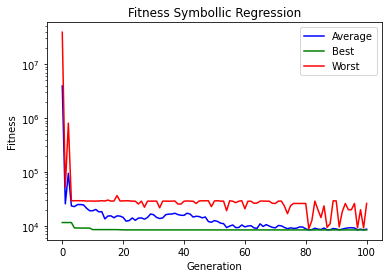

In [21]:
#plot statistics:
x = np.arange(0, MAX_GENERATIONS+1)
avgArray = np.array(avgListFitness)
stdArray = np.array(stdListFitness)
minArray = np.array(minListFitness)
maxArray = np.array(maxListFitness)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Symbollic Regression')
# plt.errorbar(x, avgArray.mean(0), yerr=stdArray.mean(0),label="Average",color="Red")
# plt.errorbar(x, minArray.mean(0), yerr=minArray.std(0),label="Best", color="Green")
plt.plot(x, avgArray.mean(0),label="Average",color="Blue")
plt.plot(x, minArray.mean(0),label="Best", color="Green")
plt.plot(x, maxArray.mean(0),label="Worst", color="Red")
plt.yscale('log')
# plt.plot(x, maxArray.mean(0),label="Worst", color="Blue")
# plt.errorbar(x, maxArray.mean(0), yerr=maxArray.std(0),label="Best", color="Blue")
plt.legend()
# plt.ylim([0, 100])
plt.show()

In [31]:
for r in range(0, N_RUNS):
    # create initial population (generation 0):
    population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                           bnf_grammar=BNF_GRAMMAR,
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    # prepare the statistics object:
    # stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
    # stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
    # if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.nanmean)
    stats.register("std", np.nanstd)
    stats.register("min", np.nanmin)
    stats.register("max", np.nanmax)

    # Which run are we on?
    print("\n\nCurrently on run", r, "of", N_RUNS)
    # perform the Grammatical Evolution flow:
    population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                            ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                                            bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE,
                                                            max_tree_depth=MAX_TREE_DEPTH,
                                                            # points_train=[
                                                            #     X_train, y_train],
                                                            points_train=[X_train_2D, y_train],
                                                            # points_test=[
                                                            #     X_test, y_test],
                                                            points_test=[
                                                                X_test_2D, y_test],
                                                            stats=stats, halloffame=hof, verbose=True)

    max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
    min_fitness_values, std_fitness_values = logbook.select("min", "std")

    # fitness_test = logbook.select("fitness_test")
    best_ind_length = logbook.select("best_ind_length")
    avg_length = logbook.select("avg_length")
    max_length = logbook.select("max_length")
    # selection_time = logbook.select("selection_time")
    # generation_time = logbook.select("generation_time")
    # gen, invalid = logbook.select("gen", "invalid")

    # Save statistics for this run:
    avgListFitness.append(mean_fitness_values)
    stdListFitness.append(std_fitness_values)
    minListFitness.append(min_fitness_values)
    maxListFitness.append(max_fitness_values)

    avgListSize.append(avg_length)
    bestListSize.append(best_ind_length)
    # stdListSize.append(stdSizeValues)
    # minListSize.append(minSizeValues)
    maxListSize.append(max_length)

    best = hof.items[0].phenotype  # parser to change the individual
    print("Best individual: \n", "\n".join(textwrap.wrap(best, 80)))
    print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
    print("Depth: ", hof.items[0].depth)
    print("Length of the genome: ", len(hof.items[0].genome))
    print(
        f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')




Currently on run 0 of 1
gen	invalid	avg    	std    	min    	max    	fitness_test	best_ind_length	avg_length	best_ind_nodes	avg_nodes	best_ind_depth	avg_depth	avg_used_codons	best_ind_used_codons	structural_diversity	fitness_diversity	selection_time	generation_time
0  	0      	22265.1	8986.09	9584.05	42317.3	nan         	7              	9.68421   	4             	4.52632  	3             	4.05263  	6.68421        	5                   	0.85                	0.060241         	0             	0.0074501      
1  	27     	19931.9	10035.8	8612.41	42321.1	nan         	24             	32.3333   	4             	4.33333  	3             	3.66667  	6.06667        	5                   	0.56                	0.0391566        	0.000345469   	0.019362       
2  	24     	17608.9	9319.92	8612.41	39327  	nan         	24             	47.3684   	4             	4.26316  	3             	3.42105  	5.73684        	5                   	0.55                	0.0451807        	0.000290632   	0.0153968      
3  	22    

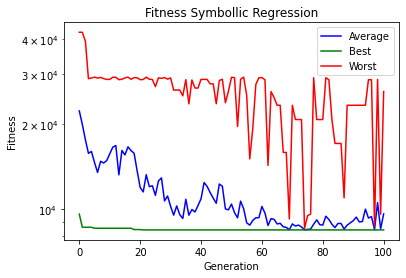

In [32]:
#plot statistics:
x = np.arange(0, MAX_GENERATIONS+1)
avgArray = np.array(avgListFitness)
stdArray = np.array(stdListFitness)
minArray = np.array(minListFitness)
maxArray = np.array(maxListFitness)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Symbollic Regression')
# plt.errorbar(x, avgArray.mean(0), yerr=stdArray.mean(0),label="Average",color="Red")
# plt.errorbar(x, minArray.mean(0), yerr=minArray.std(0),label="Best", color="Green")
plt.plot(x, avgArray.mean(0),label="Average",color="Blue")
plt.plot(x, minArray.mean(0),label="Best", color="Green")
plt.plot(x, maxArray.mean(0),label="Worst", color="Red")
plt.yscale('log')
# plt.plot(x, maxArray.mean(0),label="Worst", color="Blue")
# plt.errorbar(x, maxArray.mean(0), yerr=maxArray.std(0),label="Best", color="Blue")
plt.legend()
# plt.ylim([0, 100])
plt.show()

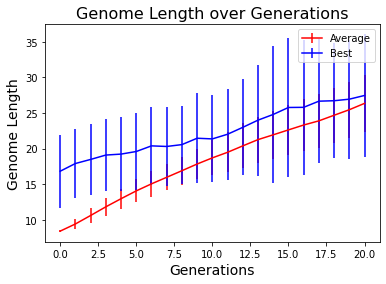

In [47]:
x = np.arange(0, MAX_GENERATIONS+1)
avgSizeArray = np.array(avgListSize)
bestSizeArray = np.array(bestListSize)
maxSizeArray = np.array(maxListSize)


plt.errorbar(x, avgSizeArray.mean(0), yerr=avgSizeArray.std(0),label="Average",color="Red")
# plt.errorbar(x, maxSizeArray.mean(0), yerr=maxSizeArray.std(0), label="Max", color="Green")
plt.errorbar(x, bestSizeArray.mean(0), yerr=bestSizeArray.std(0), label="Best", color="Blue")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.legend()
plt.show()